<a href="https://colab.research.google.com/github/Mehadi4021/Digital-Image-Processing_Lab_CSE438/blob/main/Lab_Assignment_4_Md_Mehadi_Hasan_2125051003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digital Image Processing Lab
Name:Md. Mehadi Hasan
ID: 2125051003
Course Code: CSE 438  
Course Title: Digital Image Processing Lab  
Section:8A (50th Batch)  
Date: 12 april, 2025

Faculty: Audity Ghosh  
Lecturer, Department of Computer Science & Engineering, University of Information Technology and Sciences (UITS)


Install required libraries

In [1]:
!pip install matplotlib opencv-python-headless

Import libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

 Read a black and white image from URL

In [3]:
# Use any black and white image URL
url = 'https://img.freepik.com/free-photo/closeup-scarlet-macaw-from-side-view-scarlet-macaw-closeup-head_488145-3540.jpg'

# Read image from URL
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
img = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)  # Read as grayscale

Define the custom filter and normalize it

In [4]:
# Custom weighted filter
kernel = np.array([[1, 1, 1],
                   [1, 2, 1],
                   [1, 1, 1]], dtype=np.float32)

# Normalize the filter
kernel = kernel / kernel.sum()  # Divide by 10


 Apply the filter manually

In [6]:
def apply_filter_manually(image, kernel):
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2

    # Pad image to avoid boundary issues
    padded_img = cv2.copyMakeBorder(image, pad_h, pad_h, pad_w, pad_w, cv2.BORDER_REFLECT)

    # Create an empty output image
    filtered_img = np.zeros_like(image, dtype=np.float32)

    # Apply the filter manually
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_img[i:i+kh, j:j+kw]
            filtered_value = np.sum(region * kernel)
            filtered_img[i, j] = filtered_value

    return np.clip(filtered_img, 0, 255).astype(np.uint8)
manual_filtered = apply_filter_manually(img, kernel)

 Apply the filter using

In [7]:
cv2_filtered = cv2.filter2D(img, -1, kernel)

Plot original, manual, and OpenCV filtered images

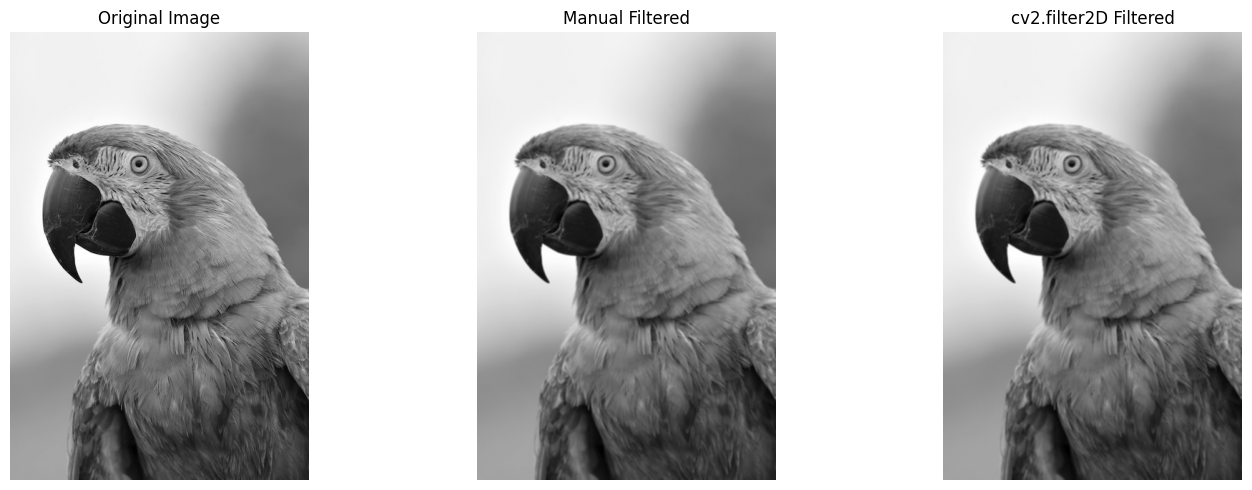

In [8]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(manual_filtered, cmap='gray')
plt.title('Manual Filtered')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2_filtered, cmap='gray')
plt.title('cv2.filter2D Filtered')
plt.axis('off')

plt.tight_layout()
plt.show()
